In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df.head()
#df.shape-82567 entries

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


Text(0, 0.5, 'Countries')

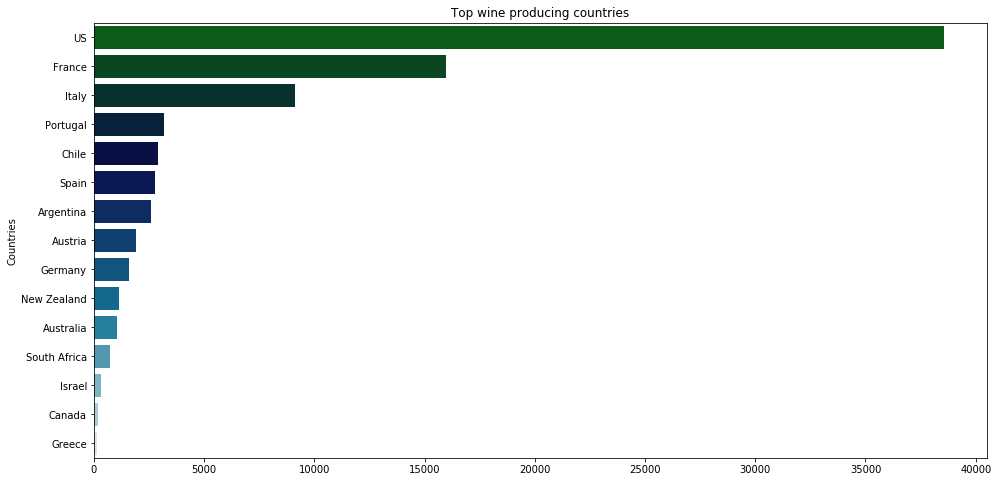

In [20]:
fig,ax = plt.subplots(figsize=(16,8))
top_wine_producers = df['country'].value_counts()[:15]
x = top_wine_producers.index
y = top_wine_producers.values
sns.barplot(y,x,palette='ocean')
ax.set_title('Top wine producing countries')
ax.set_ylabel('Countries')

In [4]:
#df['review_title'].head()
#df['review_description'].head()
#df.dropna(axis = 0)
#df_sorted_by_price.head(5)

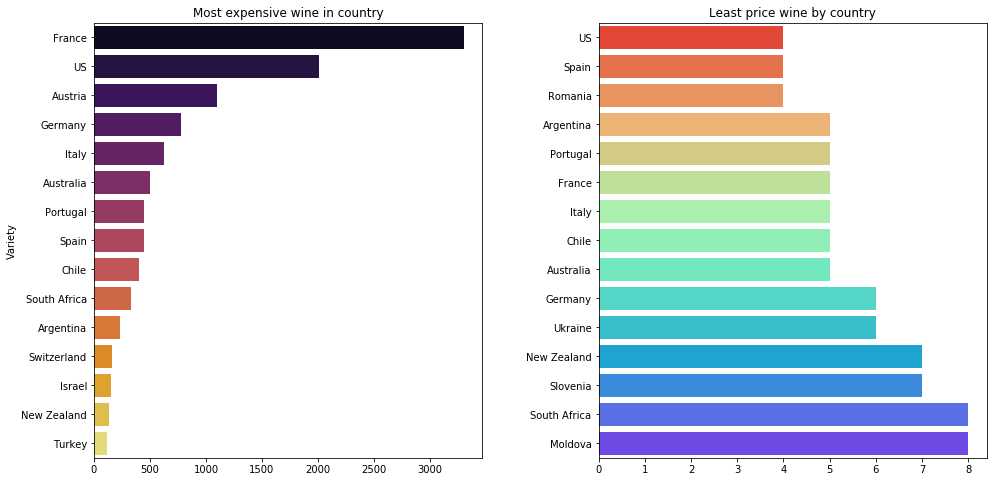

In [5]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = df.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Least price wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

AttributeError: 'AxesSubplot' object has no attribute 'set_y_label'

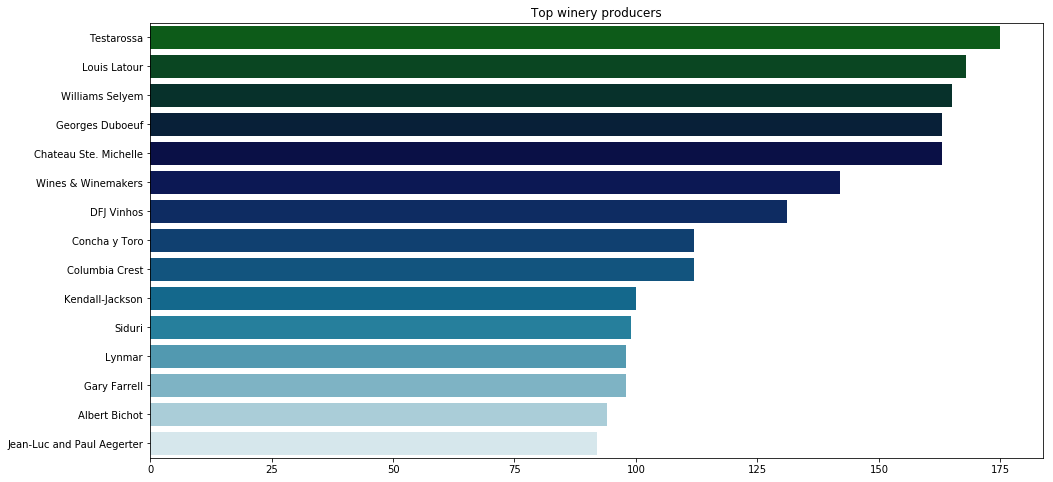

In [21]:
fig,ax = plt.subplots(figsize=(16,8))
top_winery_producers = df['winery'].value_counts()[:15]
x = top_winery_producers.index
y = top_winery_producers.values
sns.barplot(y,x,palette='ocean')
ax.set_title('Top winery producers')
ax.set_y_label('Winery')

Text(0.5, 1.0, 'Highest Average Price of Wines country-wise')

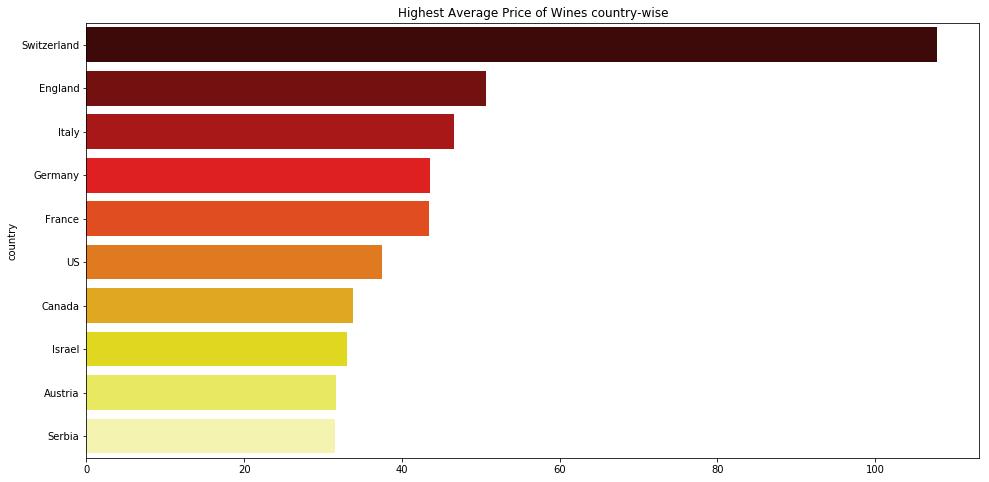

In [24]:
fig,ax = plt.subplots(figsize=(16,8))
df_by_price = df.groupby('country').agg({'price':'mean'}).sort_values(['price'],ascending = False)[:10]
c1 = df_by_price.index
c2 = df_by_price.values.flatten()
sns.barplot(c2,c1,palette='hot')
ax.set_title('Highest Average Price of Wines country-wise')

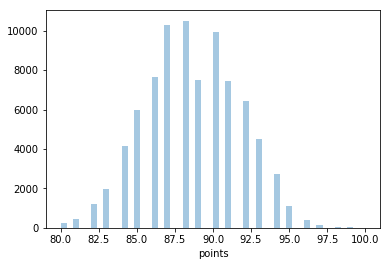

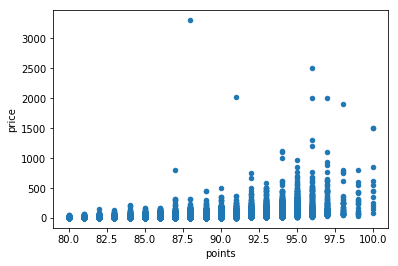

In [32]:
sns.distplot(df['points'],kde=False)

df.plot.scatter(x='points',y='price')
#The points follow a normal distribution

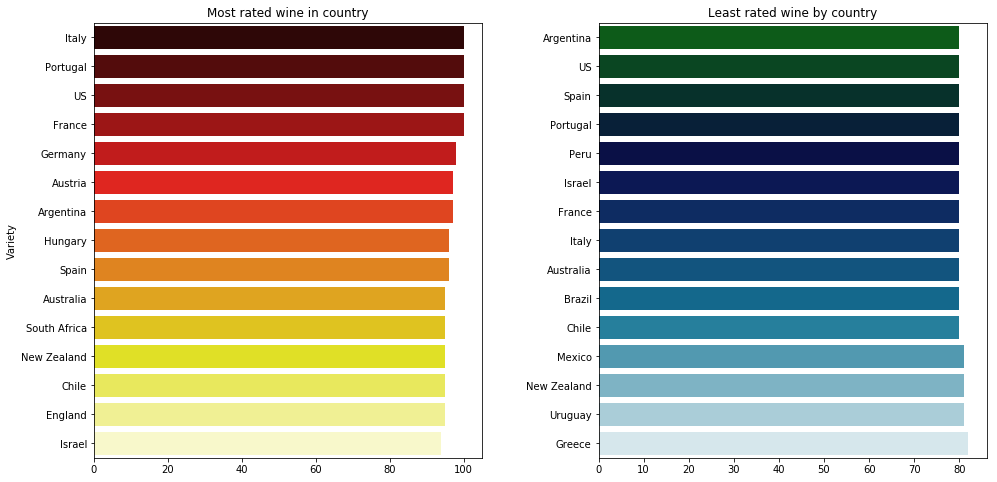

In [10]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Most rated wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = df.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Least rated wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

Number of varity of wines 28


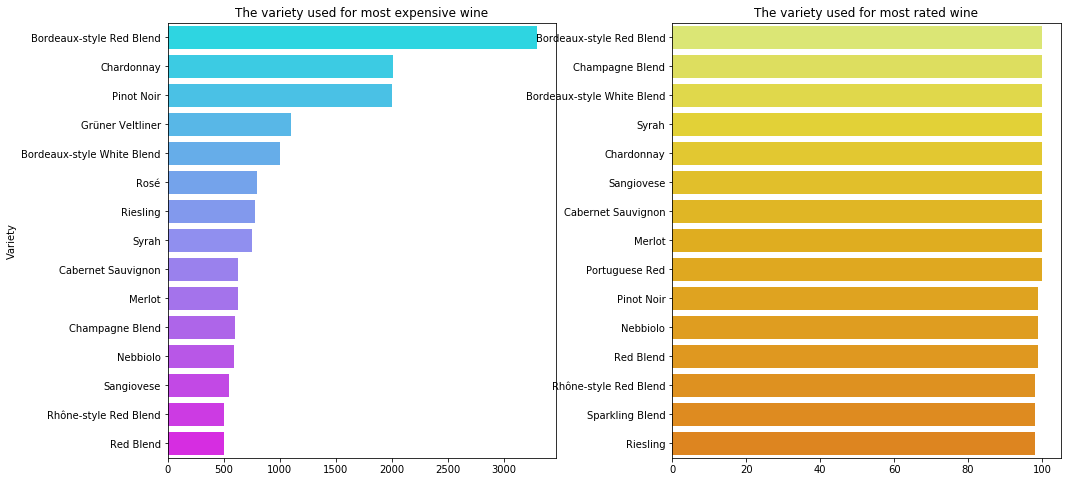

In [11]:
print('Number of varity of wines',df['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('The variety used for most expensive wine')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = df.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'Wistia',ax=ax2)
ax2.set_title('The variety used for most rated wine')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

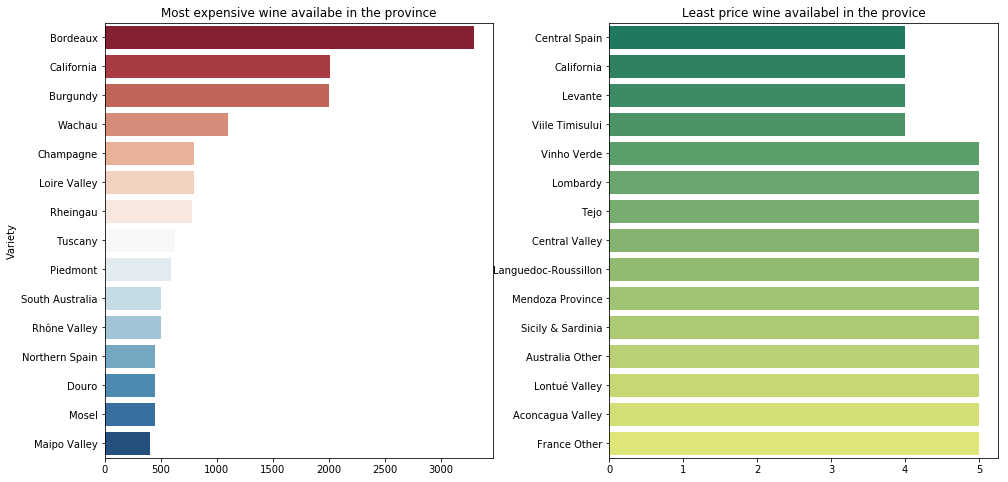

In [12]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = df.groupby(['province'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'RdBu',ax=ax1)
ax1.set_title('Most expensive wine availabe in the province')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = df.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'summer',ax=ax2)
ax2.set_title('Least price wine availabel in the provice')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

In [34]:
df.loc[df['winery']=='Louis Latour']

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
197,@vossroger,France,Louis Latour 2011 Chambolle-Musigny,"This is a beautiful, rounded and soft wine wit...",NaN,89,75.0,Burgundy,Chambolle-Musigny,NaN,Louis Latour,Pinot Noir
404,@vossroger,France,Louis Latour 2013 Pouilly-Vinzelles,"Crisp and fresh, this is a tangy, lemon and or...",NaN,87,NaN,Burgundy,Pouilly-Vinzelles,NaN,Louis Latour,Chardonnay
668,@vossroger,France,Louis Latour 2015 Montrachet,"This opulent, powerful wine has weight, richne...",NaN,97,650.0,Burgundy,Montrachet,NaN,Louis Latour,Chardonnay
1007,@vossroger,France,Louis Latour 2009 Bâtard-Montrachet (Bâtard-M...,"Very mineral, textured wine, its acidity and t...",Bâtard-Montrachet,93,299.0,Burgundy,Bâtard-Montrachet,NaN,Louis Latour,Chardonnay
1053,@vossroger,France,Louis Latour 2014 Cuvée Héritiers Latour (Cha...,"Powerful and complex, this dark wine comes fro...",Cuvée Héritiers Latour,95,350.0,Burgundy,Chambertin,NaN,Louis Latour,Pinot Noir
2281,NaN,France,Louis Latour 2000 Puligny-Montrachet,"This wine sees only 10–15% new oak, which allo...",NaN,88,42.0,Burgundy,Puligny-Montrachet,NaN,Louis Latour,Chardonnay
2757,@vossroger,France,Louis Latour 2010 Montrachet,Using grapes sourced from the greatest white-w...,NaN,94,430.0,Burgundy,Montrachet,NaN,Louis Latour,Chardonnay
2774,@vossroger,France,Louis Latour 2008 Goutte d'Or Premier Cru (Me...,Big and broad with fruit that is full and ripe...,Goutte d'Or Premier Cru,91,69.0,Burgundy,Meursault,NaN,Louis Latour,Chardonnay
3365,@vossroger,France,Louis Latour 2011 Clos de Vougeot,The wine has the right weight and power. It co...,NaN,93,280.0,Burgundy,Clos de Vougeot,NaN,Louis Latour,Pinot Noir
3737,@vossroger,France,Louis Latour 2014 La Garenne Premier Cru (Pul...,This wine has all the tight minerality of the ...,La Garenne Premier Cru,93,100.0,Burgundy,Puligny-Montrachet,NaN,Louis Latour,Chardonnay
